In [3]:
# Dependencies and Setup.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key.
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude.
from citipy import citipy

In [4]:
# Empty list for holding the latitude and longitude combinations.
lat_lngs = []

# Empty list for holding the cities names.
cities = []

# Range of latitudes and longitudes.
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations.
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


# Create Plots to Showcase the Relationship Between Weather Variables and Latitude

In [5]:
# Set the API base URL.
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city.
city_data = []

# Print to logger.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data.
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city.
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers.
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list.
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | talara
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 1 | saint george
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | constitucion
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | nerchinsk
Processing Record 8 of Set 1 | vyartsilya
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | talnakh
Processing Record 11 of Set 1 | vao
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | airai
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | te anau
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | necochea
Processing Record 19 of Set 1 | castro
Processing Record 20 of Set 1 | chuy
Processing Record 21 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 22 of Set 1 | h

Processing Record 34 of Set 4 | ozgon
City not found. Skipping...
Processing Record 35 of Set 4 | mao
Processing Record 36 of Set 4 | bossier city
Processing Record 37 of Set 4 | cabedelo
Processing Record 38 of Set 4 | ponta delgada
Processing Record 39 of Set 4 | lengshuitan
Processing Record 40 of Set 4 | darmstadt
Processing Record 41 of Set 4 | maroantsetra
Processing Record 42 of Set 4 | mwinilunga
Processing Record 43 of Set 4 | mykolayivka
Processing Record 44 of Set 4 | merauke
Processing Record 45 of Set 4 | mpanda
Processing Record 46 of Set 4 | saint-francois
Processing Record 47 of Set 4 | mococa
Processing Record 48 of Set 4 | leh
Processing Record 49 of Set 4 | ponta do sol
Processing Record 0 of Set 5 | waingapu
Processing Record 1 of Set 5 | kharovsk
Processing Record 2 of Set 5 | maneadero
Processing Record 3 of Set 5 | lompoc
Processing Record 4 of Set 5 | mayo
Processing Record 5 of Set 5 | maracacume
Processing Record 6 of Set 5 | hirara
Processing Record 7 of Set 

Processing Record 22 of Set 8 | maiduguri
Processing Record 23 of Set 8 | shubarkuduk
Processing Record 24 of Set 8 | powell
Processing Record 25 of Set 8 | atyrau
Processing Record 26 of Set 8 | villa guerrero
Processing Record 27 of Set 8 | tatawin
Processing Record 28 of Set 8 | epe
Processing Record 29 of Set 8 | aguas vermelhas
Processing Record 30 of Set 8 | jinchang
Processing Record 31 of Set 8 | umm lajj
Processing Record 32 of Set 8 | lagoa
Processing Record 33 of Set 8 | iwanai
Processing Record 34 of Set 8 | coihaique
Processing Record 35 of Set 8 | brigantine
Processing Record 36 of Set 8 | pajan
Processing Record 37 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 38 of Set 8 | otofuke
Processing Record 39 of Set 8 | barreirinhas
Processing Record 40 of Set 8 | nikel
Processing Record 41 of Set 8 | acari
Processing Record 42 of Set 8 | ilhabela
Processing Record 43 of Set 8 | dianopolis
City not found. Skipping...
Processing Record 44 of Set

Processing Record 7 of Set 12 | safwah
City not found. Skipping...
Processing Record 8 of Set 12 | konakovo
Processing Record 9 of Set 12 | saleaula
City not found. Skipping...
Processing Record 10 of Set 12 | saldanha
Processing Record 11 of Set 12 | pangkalanbuun
Processing Record 12 of Set 12 | port augusta
Processing Record 13 of Set 12 | mustafabad
Processing Record 14 of Set 12 | la ronge
Processing Record 15 of Set 12 | tiquicheo
Processing Record 16 of Set 12 | borovoy
Processing Record 17 of Set 12 | carbonia
Processing Record 18 of Set 12 | zlatoustovsk
City not found. Skipping...
Processing Record 19 of Set 12 | harrisonburg
Processing Record 20 of Set 12 | srednekolymsk
Processing Record 21 of Set 12 | nerang
Processing Record 22 of Set 12 | tarudant
City not found. Skipping...
Processing Record 23 of Set 12 | andenes
Processing Record 24 of Set 12 | ambulu
Processing Record 25 of Set 12 | murgab
Processing Record 26 of Set 12 | marawi
Processing Record 27 of Set 12 | santa

In [7]:
# Convert the cities weather data into a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

# Show Record Count.
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [8]:
# Display sample data.
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,talara,-4.5772,-81.2719,304.57,48,0,5.14,PE,1675100049
1,saint george,37.1041,-113.5841,275.06,59,100,3.09,US,1675100050
2,bluff,-46.6000,168.3333,286.96,92,95,2.49,NZ,1675100051
3,constitucion,-35.3333,-72.4167,296.07,62,12,6.19,CL,1675100051
4,mataura,-46.1927,168.8643,285.11,98,90,1.31,NZ,1675100052


In [10]:
# Export the City_Data into a csv.
city_data_df.to_csv("output_data/cities.csv", index_label = "City_ID")

In [11]:
# Read saved data.
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data.
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,talara,-4.5772,-81.2719,304.57,48,0,5.14,PE,1675100049
1,saint george,37.1041,-113.5841,275.06,59,100,3.09,US,1675100050
2,bluff,-46.6000,168.3333,286.96,92,95,2.49,NZ,1675100051
3,constitucion,-35.3333,-72.4167,296.07,62,12,6.19,CL,1675100051
4,mataura,-46.1927,168.8643,285.11,98,90,1.31,NZ,1675100052


## Latitude vs. Temperature

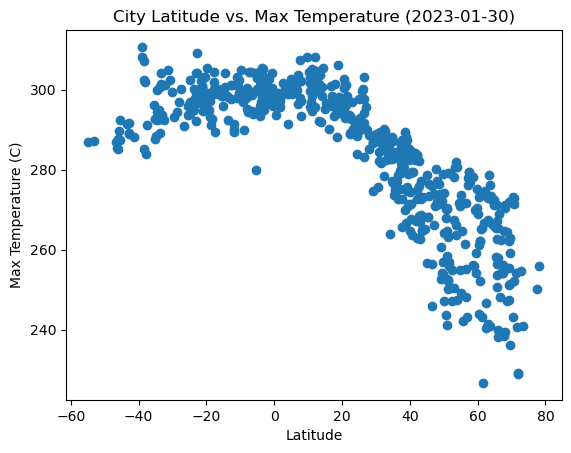

In [15]:
# Build scatter plot for latitude vs. temperature.
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties.
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2023-01-30)")

# Save the figure.
plt.savefig("output_data/Fig1.png")

# Show plot.
plt.show()

## Latitude vs. Humidity

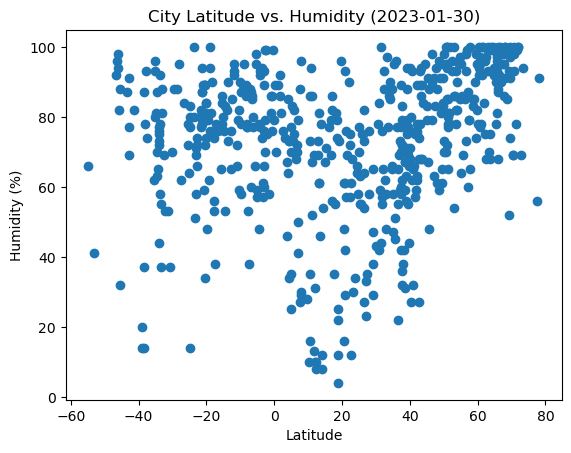

In [16]:
# Build scatter plot for latitude vs. temperature.
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties.
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-01-30)")

# Save the figure.
plt.savefig("output_data/Fig2.png")

# Show plot.
plt.show()

## Latitude vs. Cloudiness

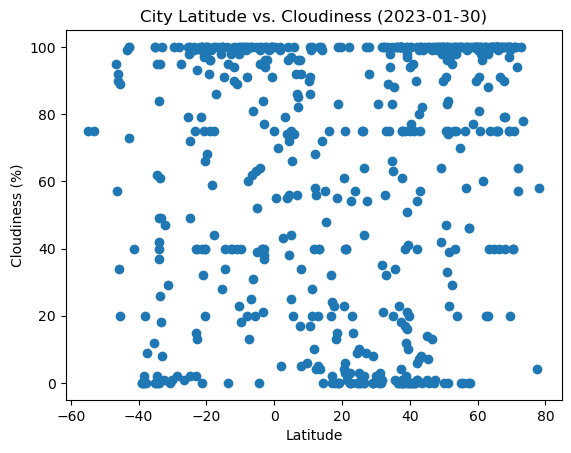

In [17]:
# Build scatter plot for latitude vs. temperature.
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties.
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-01-30)")

# Save the figure.
plt.savefig("output_data/Fig3.png")

# Show plot.
plt.show()

## Latitude vs. Wind Speed

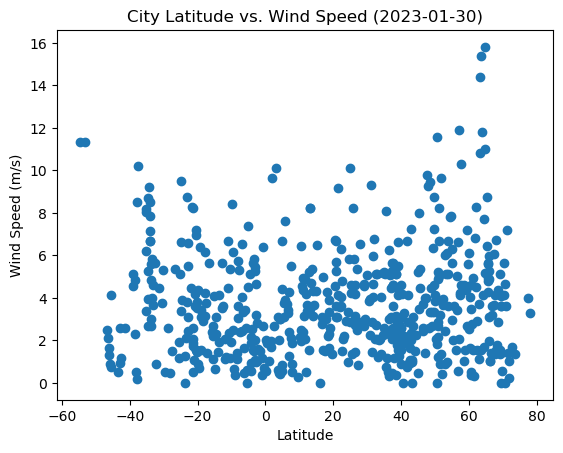

In [18]:
# Build scatter plot for latitude vs. temperature.
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties.
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-01-30)")

# Save the figure.
plt.savefig("output_data/Fig4.png")

# Show plot.
plt.show()